In [4]:
import pipeline_functions as pf
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import sklearn.naive_bayes
import sklearn.neural_network
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns

## Data Loading and Dataframe Creation

In [39]:
#to load

def specify_range(df, col, min, max):
    ''' 
    Narrow down a data frame based on a range for a given column
    
    Inputs:
        df (data frame): dataframe to narrow down
        col (data frame column name, str): column to find range in
        min, max: minimum and maximum values for range. Can be str or int depending on column type 
    '''
    output_df = df.loc[(df[col] >= min) & (df[col] <= max)]
    return output_df

all_projects = pf.read_csv('projects.csv')
outcomes = pf.read_csv('outcomes.csv')

projects = specify_range(all_projects, 'date_posted', '2011-01-01', '2013-12-31')
combined = pd.merge(projects, outcomes, on='projectid')
funded = combined.loc[combined.fully_funded=='t']
not_funded = combined.loc[combined.fully_funded=='f']

In [5]:
all_projects = pf.read_csv('projects.csv')
outcomes = pf.read_csv('outcomes.csv')

In [6]:
"all_projects", all_projects.shape, "outcomes", outcomes.shape

('all_projects', (370039, 35), 'outcomes', (619326, 12))

In [7]:
all_projects.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted'],
      dtype='object')

In [8]:
all_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [9]:
outcomes.columns

Index(['projectid', 'is_exciting', 'at_least_1_teacher_referred_donor',
       'fully_funded', 'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus',
       'donation_from_thoughtful_donor', 'great_messages_proportion',
       'teacher_referred_count', 'non_teacher_referred_count'],
      dtype='object')

Narrow down dataframes to only use project data from 2011 to 2013

In [11]:
projects = specify_range(all_projects, 'date_posted', '2011-01-01', '2013-12-31')
projects.date_posted.min(), projects.date_posted.max()

('2011-03-29', '2013-12-31')

Merge the projects and outcomes data frame together based on project ID

In [12]:
combined = pd.merge(projects, outcomes, on='projectid')
combined.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'is_exciting', 'at_least_1_teacher_referred_donor',
       'fully_funded', 'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_re

Create a dataframe of all the projects that were fully funded vs not funded. 

In [13]:
funded = combined.loc[combined.fully_funded=='t']
funded.shape

(229762, 46)

In [14]:
not_funded = combined.loc[combined.fully_funded=='f']
not_funded.shape

(95504, 46)

## Data Exploration & Pre-Processing

In [41]:
# to load

def find_top(df, col_of_interest, sort_by='projectid', ascending=False):
    '''
    Find the most common (or least) values in a given column
    
    Inputs:
        df (pandas dataframe): dataframe of interest
        col (str): name of column of interest
        sort_by (pandas series): column to sort dataframe by
        ascending: default to False, will show highest values 
        
    Output:
        output (pandas dataframe): Sorted pandas dataframe
    '''
    grouped = df.groupby(col_of_interest, sort=False).count()
    
    return grouped.sort_values(by=sort_by, ascending=False)

funded_by_state = find_top(funded, 'school_state')
funded_by_state.projectid.head()
limstate = funded_by_state['projectid'].head(10)

by_focus_area = find_top(projects, 'primary_focus_area')
limfocus = by_focus_area['projectid'].head(5)

find_top(combined, 'fully_funded')
ff_labels = ["Yes", "No"]
ff_vals = [247698, 105453]

In [60]:
projects.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,3.018980e+05,325266.000000,325266.000000,325266.000000,325266.000000,325266.000000,325266.000000,325165.000000
mean,2.496369e+11,36.903208,-95.706232,56866.907380,31.982009,537.309216,632.128512,94.567616
std,1.653664e+11,4.920718,18.203832,31074.688584,2.445752,862.927189,1015.208451,157.738063
min,1.000050e+10,18.249140,-171.690554,1001.000000,30.000000,37.030000,43.560000,1.000000
25%,6.351301e+10,33.923898,-117.698303,29483.000000,30.000000,290.560000,341.840000,23.000000
50%,2.314790e+11,36.755021,-90.036428,60632.000000,30.000000,430.320000,506.260000,31.000000
75%,3.904490e+11,40.681309,-80.767916,90012.000000,35.000000,615.827500,724.505000,100.000000
max,6.100008e+11,67.258157,-66.628036,99926.000000,35.000000,139725.410000,164382.840000,12143.000000


In [61]:
outcomes.describe()

,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
count,439487.00000,524928.000000,524928.000000
mean,52.92709,0.777339,4.361290
std,35.71410,2.227933,5.668748
min,0.00000,0.000000,0.000000
25%,25.00000,0.000000,1.000000
50%,50.00000,0.000000,3.000000
75%,83.00000,0.000000,5.000000
max,100.00000,151.000000,304.000000


In [62]:
pf.na_cols(projects)

['school_ncesid',
 'school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level',
 'students_reached']

In [63]:
projects.students_reached.describe()

count    325165.000000
mean         94.567616
std         157.738063
min           1.000000
25%          23.000000
50%          31.000000
75%         100.000000
max       12143.000000
Name: students_reached, dtype: float64

In [64]:
pf.na_cols(outcomes)

['at_least_1_teacher_referred_donor',
 'at_least_1_green_donation',
 'three_or_more_non_teacher_referred_donors',
 'one_non_teacher_referred_donor_giving_100_plus',
 'donation_from_thoughtful_donor',
 'great_messages_proportion',
 'teacher_referred_count',
 'non_teacher_referred_count']

For both the projects and outcomes dataframes the columns that contain N/A values are not necessarily required for every project.
Further, they generally are not suited for statistical analysis or imputation. 

In [66]:
by_state = find_top(projects, 'school_state')

In [36]:
funded_by_state = find_top(funded, 'school_state')
funded_by_state.projectid.head()
limstate = funded_by_state['projectid'].head(10)
limstate

school_state
CA    53000
NY    19090
TX    14509
FL    11743
IL    10822
NC     9531
GA     6004
TN     5612
WA     5436
PA     4980
Name: projectid, dtype: int64

#### The states where the most number of projects are requested are California, New York, Texas, Florida, and North Carolina. This is not surprising as these are some of the larger states, and the ones who often have problems with public school funding, especially in urban areas. However, the most projects are funded in the first four states, and then in Illinois. 

In [68]:
by_focus_area = find_top(projects, 'primary_focus_area')
limfocus = by_focus_area['projectid'].head(5)
limfocus

primary_focus_area
Literacy & Language    148732
Math & Science          81255
Music & The Arts        29268
Applied Learning        22303
Special Needs           21462
Name: projectid, dtype: int64

#### The primary subject areas where projects mostly concentrated with Literacy & Language, Math & Science, Music & The Arts, Applied Learning,and Special Needs.

In [69]:
print("Funds Requested")
print("Mean", projects.total_price_excluding_optional_support.mean())
print("Maximum", projects.total_price_excluding_optional_support.max())
print("Minimum", projects.total_price_excluding_optional_support.min())

Funds Requested
Mean 537.309215657
Maximum 139725.41
Minimum 37.03


In [70]:
print("Funds Provided")
print("Mean", funded.total_price_excluding_optional_support.mean())
print("Maximum", funded.total_price_excluding_optional_support.max())
print("Minimum", funded.total_price_excluding_optional_support.min())

Funds Provided
Mean 488.181038292
Maximum 139725.41
Minimum 37.03


#### While the average amount requested for a project was 531 dollars, the average amount requested for the projects that were fully funded was 482 dollars. 

In [71]:
find_top(funded, 'is_exciting')
#funded_exciting = round((31611 / (31611 + 216087))*100)

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
is_exciting,,,,,,,,,,,,,,,,,,,,,
f,200788,200788,200788,186749,200788,200788,200788,200788,200788,177881,...,200762,200788,200762,200788,200762,200762,200762,196509,200762,200762
t,28974,28974,28974,26343,28974,28974,28974,28974,28974,25476,...,28974,28974,28974,28974,28974,28974,28974,28974,28974,28974


In [72]:
find_top(funded, 'is_exciting')
funded_exciting = round((31611 / (31611 + 216087))*100)
funded_exciting

13

In [73]:
list(not_funded.is_exciting.unique())

['f']

#### Even among the funded projects, only 13% were deemed "exciting". However, none of the not funded projects were deemed exciting. 

In [74]:
find_top(combined, 'fully_funded')
ff_labels = ["Yes", "No"]
ff_vals = [247698, 105453]

## Data Representation 

In [20]:
def plot_bar_chart(xvals, yvals, xlabel, ylabel, title, width = 0.35, color = 'purple'):
    '''
    Takes in values and labels and plots a bar chart/
    
    Inputs:
        N (int): number of bars
        xvals (tuple): x value categories
        yvals (tuple): y values
        xlabel, ylabel, title (string): labels for x-axis, y-axis, and title
        width (float): width of each bar, defaults to 0.35
        color (string): color of bars, defaults to purple
            color choices: https://matplotlib.org/api/colors_api.html
    '''
    counts = yvals

    ind = np.arange(len(xvals))  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, counts, width, color=color)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(xvals)
    
    plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis labels

    plt.show()

In [42]:
def bar_top(df, col_of_interest, xlabel, ylabel, title, sort_by='projectid', max = 5, width =0.35, color='blue'):
    '''
    Creates a bar chart of the top categories in a given column
    
    Inputs:
        df (pandas dataframe): dataframe of interest
        col_of_interest (str): name of column of interest
        sort_by (pandas series): column to sort dataframe by
        xlabel, ylabel, title (string): labels for x-axis, y-axis, and title
        width (float): width of each bar, defaults to 0.35
        color (string): color of bars, defaults to purple
            color choices: https://matplotlib.org/api/colors_api.html
    '''
    
    top = find_top(df, col_of_interest)
    top = top[selected_col].head(max)
        
    plot_bar_chart(tuple(top.index), tuple(top), xlabel, ylabel, title, width, color)


In [ ]:
def plot_pie_chart(vals, labels, colors = ["red", "blue", "green", "violet", "orange"]):
    '''
    Takes in values and labels and plots a pie chart
    
    Inputs:
        vals (list of ints): values to be charted
        labels (list of strings): labels for each section
        colors (list of strings): Colors for each section of graph. Must be the same length as the number of vals.
            color choices: https://matplotlib.org/api/colors_api.html
    '''
    
    if len(colors) < len(vals):
        print("Please insert more colors")
    
    plt.pie(
    vals,
    labels=labels,
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    #explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

    plt.axis('equal')

    # View the plot
    plt.tight_layout()
    plt.show()

In [101]:
def plot_correlation_heatmap(df):
    '''
    Creates a correlation heat map of a data frame
    
    Input:
        df (pandas dataframe): data frame to be plotted 
    '''
    
    corr = df.corr()
    sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
    plt.show()

In [1]:
def pie_top(df, col_of_interest, sort_by='projectid', labels = '', colors = ["red", "blue", "green", "violet", "orange"]):
    '''
    Creates a pie chart of the top categories in a given column
    
    Inputs:
        df (pandas dataframe): dataframe of interest
        col_of_interest (str): name of column of interest
        sort_by (pandas series): column to sort dataframe by
        labels (list of strings): labels for each section
        colors (list of strings): Colors for each section of graph. Must be the same length as the number of vals.
            color choices: https://matplotlib.org/api/colors_api.html
    '''
    
    
    top = find_top(df, col_of_interest)
    top = top[selected_col]
    if labels == '':
        labels = tuple(top.index)
        
    plot_pie_chart(tuple(top), labels, colors)

### Do most projects get funded?

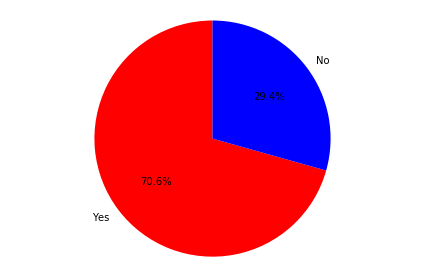

In [111]:
pie_top(combined, 'fully_funded', labels = ("Yes", "No"))

### What subjects does the funding go towards?

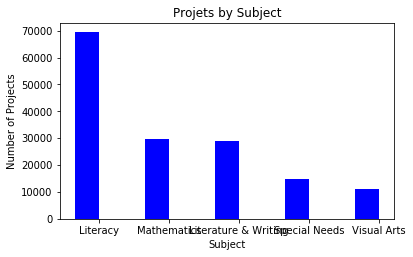

In [38]:
bar_top(funded, 'primary_focus_subject', "Subject", "Number of Projects", "Projets by Subject")

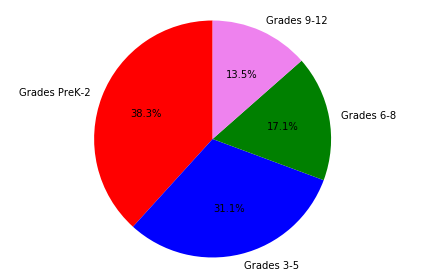

In [107]:
pie_top(funded, 'grade_level')

### Which states are the most funded projects located in?

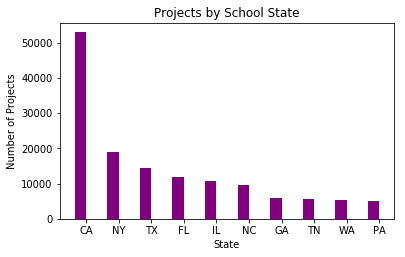

In [37]:
plot_bar_chart(tuple(limstate.index), tuple(limstate), "State", "Number of Projects", "Projects by School State")

### Which socioeconomic groups would most of the projects help . . . . 

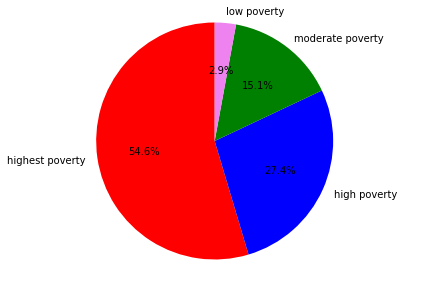

In [109]:
pie_top(projects, "poverty_level")

### and which projects get funded? 

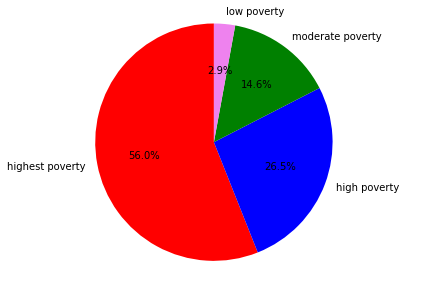

In [108]:
pie_top(funded, "poverty_level")

The correlation heatmaps were not included as they were not informative and the insight provided was redundant. 

## Generate Features/Predictors

## Build Classifier

#### K Nearest Neighbors

#### Neural Net

#### Logistic Regression

#### Decision Trees

#### SVM

#### Random Forests

#### Boosting

#### Bagging

## Evaluation

accuracy,
precision at different levels,
recall at different levels,
F1, area under curve,
precision-recall curves